In [4]:
import numpy as np
import pandas as pd 
import cv2
from skimage import io


In [10]:
img = cv2.imread('images/gabor_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

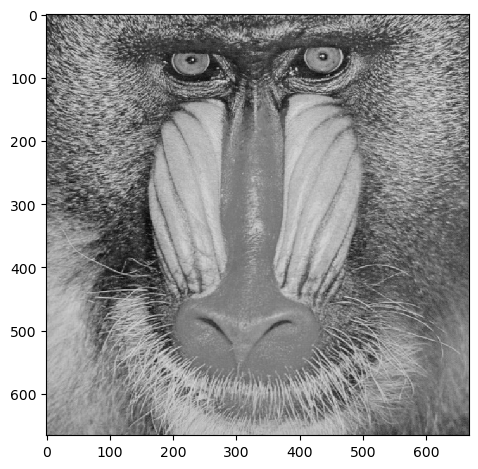

In [12]:
io.imshow(img)

In [22]:
img2 = img.reshape(-1)

In [27]:
df = pd.DataFrame()

In [29]:
df['original_pixel']= img2

In [31]:
df.head()

,original_pixel
0,95
1,103
2,52
3,45
4,70


In [33]:
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14
Gabor14 : th

In [35]:
print(df.head())

   original_pixel  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              95       0       0     255     223     117      72      47   
1             103       0       0     255     219     121      71      49   
2              52       0       0     255     208     124      67      50   
3              45       0       0     255     197     125      64      51   
4              70       0       0     255     191     116      62      47   

   Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  \
0      29       0  ...      132       38        0        0      255      255   
1      29       0  ...      136       33        0        0      255      255   
2      27       0  ...      140       23        0        0      255      255   
3      26       0  ...      151       19        0        0      255      255   
4      25       0  ...      150       25        0        0      255      255   

   Gabor29  Gabor30  Gabor31  Gabor32  
0       36      

In [37]:
df.to_csv("Gabor.csv")